<font size=7><b> Introduction to Electrophysiology

This notebook will teach you the basics of analyzing [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) data. In this homework we will perform some analysis on the data that Prof. Tal Sharf presented on Wednesday (April, 17). Prof. Sharf's experiment was done to determine the affects of a drug called [diazepam](https://en.wikipedia.org/wiki/Diazepam), on [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.). 



<font color="red"><b>Note:</b> This homework will be due April 18th at 11:59pm PT.  Make sure to complete the exercises at the bottom of this notebook.

In [ ]:
%run "electrophysiology_source_code.ipynb"

# <font color="gray"> Reading Material

<font color="red"> Required Reading:
* [Professor Sharf's paper on Neural Circuitry](reading_material/Tal_Neural_Circuitry.pdf)
* [Spike Time Tiling Introduction](./reading_material/Spike_Time_Tiling.pdf)

Briskly read through [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Some of the exercises require you to read the first few pages. [This paper's](./reading_material/Spike_Time_Tiling.pdf) discussion on Spike Time Tilling is also required reading. [braingeneerspy](https://github.com/braingeneers/braingeneerspy) is the name of the python package used by the Haussler lab for data analsyis. We will be using the [analysis toolkit](https://github.com/braingeneers/braingeneerspy/tree/master/src/braingeneers/analysis) from that package..

**Other Material**
* Wiki Articles:
    * Basic wiki articles on [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) , [diazepam](https://en.wikipedia.org/wiki/Diazepam) , [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.), [action potential](https://en.wikipedia.org/wiki/Action_potential)
    * Scholarpedia article on [Spike train analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)
* Research Papers
    * Review paper on [cerebral organoids](./reading_material/rise_of_organoids.pdf)
    * Professor  [Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf)
    * [Spike Time Tilling](./reading_material/Spike_Time_Tiling.pdf) paper



#  Spike Trains

## Spike Train

A "spike train" (or "spike raster") is an incredibly powerful tool used to analyze neural data. In this notebook you will learn to do some basic analysis on spike train data. A spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each blue dot in the matrix is a moment in time where a neuron emits a signal to other neurons. This signal can be called a "spike", a "fire", or, more scientifically, an "action potential".


When you look at a spike train, you see every single moment at which a neuron "fires". [This link](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony) is a great resource if you want to take a deeper dive into spike train analysis. Below is the complete spike raster for the control dataset from the the experiment, `Spike_Raster_Control.mat`.

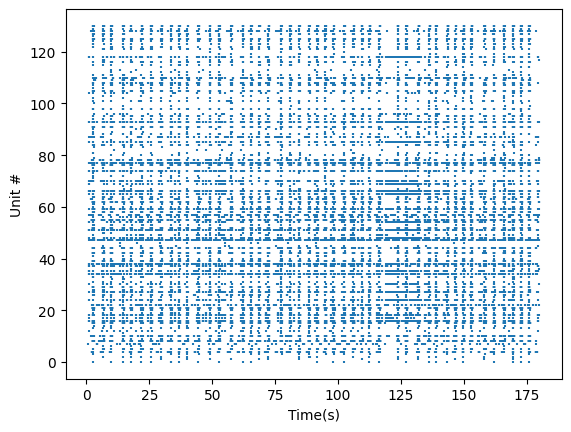

In [4]:
plot_raster(data_control)

## Analysing the Train

When scientists analyze spike trains, they are especially interested in looking at the "neural bursts" that occur. A burst is defined a short window of activity where the neurons are especially active. Looking at the spike raster above you might be able to pick out the neural bursts (the "veritcal lines"), however, bursts are easier to distinguish when you zoom in on the dataset.  

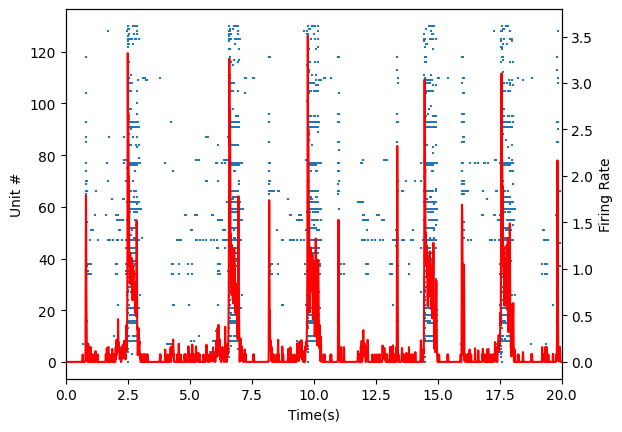

In [5]:
raster_analysis(data_control)

In the example above we have zoomed in on the first 20 seconds of the spike raster shown above. This raster also contains a red line that show the relative activity of neurons at that timestep. Looking at this 20 second window, I see **5** bursts. Defining a burst can be a little tricky. Notice that there are also areas of small activity in between bursts. Below I highlight where I see bursts and areas of activity in the spike raster.

![alt text](.images/burst_analysis.png "Title")

Neuroscientists are interested in bursts not just because they are the areas of most activity, but most importantly, because these regions display repeated patterns of consistent relationships between neurons. Below we zoom in even more on to the first two bursts of the spike raster (8 second window). Notice that the neural activity pattern (red line) looks similar for both bursts. Also, if you look at individual neurons (blue dots) you'll see that they follow similar firing patterns within both bursts.

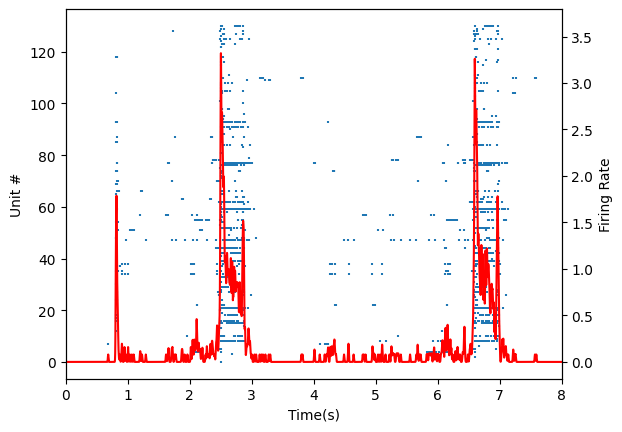

In [6]:
raster_analysis(data_control, seconds=8)

# Neural Relationships

To build the type of beautiful circuit diagrams that were discussed in class, scientists must work backwards by analyzing the firing patterns they see from neurons in the brain. They use different tools to parse out the relationship between neurons.

## Interspike Intervals

Before we attempt to answer the complicated question of "what is the relationship patterns between different neurons?", lets start with a much simpler question: "what is the relationship pattern between a single neuron and itself?". In other words, what properties can we say about the firing pattern of a single neuron?

This is a more complicated question than it might at first seem. Neurons follow a somewhat random behaviour, it is not always certain when, or how often, a neuron will fire. Lets take a "data first" approach to gain a better understanding of when neurons fire. We are going to consider the interval of time that passes in between each moment a neurons fires, this is called the interspike interval. Here is a [brief summary](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Interspike_interval.html#:~:text=The%20interspike%20interval%20is%20the,messengers%20to%20affect%20other%20neurons.) of interspike intervals. Below we see a histogram of the interspike interval for all the neurons in our spike raster from above. What probability distribution does the graph below look like?

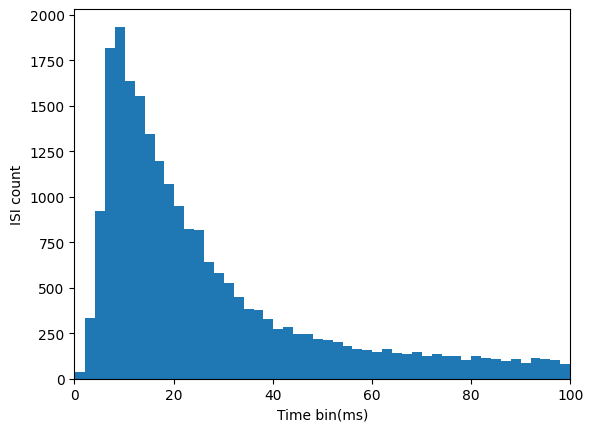

In [7]:
interspike(data_control)

<p>&nbsp</p>

<center><b>Example of Interspike Intervals</b></center>

![alt text](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/thumb/3/38/Spiketimes.png/300px-Spiketimes.png)

The mathematicians in the group will be delighted to know that intervals between spikes for a neuron tend to follow a [poission distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is not a coincidence, read the wiki article to understand why. Many of the beautiful (and complicated) statistical models used to describe the circuit patterns between neurons use the poission distribution as the fundemental building block of more complicated algorithms.

## Correlation Matrix

We have just shown that we can consider each neuron to act as a random variable, with a poission probability of firing at any given time. Given that we are now working with random variables, it is natural to use a correlation matrix to measure the relative strength in relationship between neurons. A correlation matrix displays the correlation between every pair of neurons in our spike raster. 

Below is a correlation matrix created from the spike raster above. Postively correlated neurons show up as a green dot in the plot, where negatively correlated neurons are deep blue. One could imageine strongly correlated neurons as being part of the same cicuit, or even touching. Where negatively correlated neurons may perhaps display some inhibitory cell stopping other neurons from firing. The true interpretation of a correlation matrix is much more vague than this. In reality, more nuanced techniques are used to tease apart cell circuitry. However, as the homework will show, the correlation matrix is still useful for discerning changes in neural behaviour.

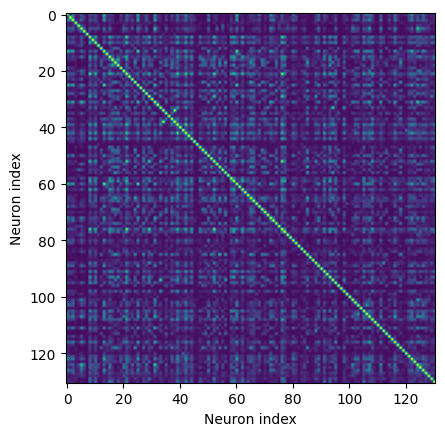

In [8]:
correlation(data_control)       

<p>&nbsp</p>
<center><b>Summary of Correlation</b></center>

![alt text](https://www.mathsisfun.com/data/images/correlation-examples.svg)

# <font color="red">Exercises

The exercises below will provide you with a better understanding of how neural data is analyzed. Note, when completing these exercises, please remember to show your work. If you typed any code to find a solution, please write down your code.

## Prof. Sharf's Paper (5 Points Total)

Read through the first few pages of [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Then answer the following questions.

### Breakthrough Device (3 Points)

What newly developed device has enabled high-resolution readouts of neural activity? What is the name of the specific device (model/maker) used in this paper? How many electrodes can it record from simultaneously?

<font color="green"><b>Answer

In this study, the researchers utilized a newly developed high-resolution neural recording technology known as high-density CMOS microelectrode arrays (CMOS MEAs) to capture detailed extracellular activity from human brain organoids. Specifically, they employed the MaxOne platform developed by Maxwell Biosystems in Zurich, Switzerland. This state-of-the-art device features 26,400 routable electrodes, of which 1,024 electrodes can be recorded from simultaneously, enabling a comprehensive spatial map of neural activity across organoid slices.
In addition to the MaxOne arrays, the team also used a 960-electrode CMOS shank probe known as Neuropixels, which allows for three-dimensional recording across the z-plane of whole organoids.

### Organoid Models (2 Points)

How long was neural activity recorded for after the cerebral organoid was placed on the recording device? What is the name of 2 drugs that were used to change the neural activity of organoids in the experiment?

<font color="green"><b>Answer

Neural activity was recorded for up to 6 months after the cerebral organoid was placed on the recording device. The researchers observed that spontaneous spiking activity typically began within approximately 2 weeks, with synchronized bursts emerging around 6 months, and peak activity occurring at around 7 months.

Two drugs used in the experiment to modulate neural activity in the organoids were diazepam and tetrodotoxin (TTX). Diazepam, a benzodiazepine, was used to alter spiking dynamics and network connectivity, leading to more uniform firing patterns and a reduction in weakly connected neuronal edges. TTX, a potent sodium channel blocker, was applied to confirm the neural origin of detected spikes by effectively silencing nearly all electrical activity in the organoid.

## Curating Raw Data (2 Points Total)

When a neuron emits a signal to other cells, it can be called a "spike", a "fire", or, more scientifically, an "action potential". The spike raster that you saw in the lecture above is the final product from considerable work done on the "raw data" recorded from electrodes. A microscopic 2D grid of electrodes calledn an [MEA](https://ars.els-cdn.com/content/image/1-s2.0-S0165027099001132-gr1.jpg) records an "action potential" across multiple locations of the neuron's body. This [wiki article](https://en.wikipedia.org/wiki/Action_potential), gives a good example of what an action potential looks like. A major step in the process of finding neurons from raw data, involves looking at "footprints" of action potentials from prospective neurons. These "footprints" are representative 2D depictions of raw data coming from electrods on the MEA. The **4** images below are footprints of prospective neurons.



For the **4** images below, classify them as either being an "action potential" or as being "noise". When determinning if a "neural footprint" is a spike or noise, consider the following-  The "spike" should be seen across multiple electrodes, furthermore, the neuron should remain consistent across multiple electrodes. There shouldn't be any significant changes in it's appearance.

<font color="orange"><b>Hint:</b> **2** of the images below are action potentials, and the other **2** are noise.

<font color="green"><b>Answer

<b>Image 1:</b> Action Potential 

<b>Image 2:</b> Noise

<b>Image 3:</b> Action Potential

<b>Image 4:</b> Noise

<b><center>Image 1</center></b>
![alt text](.images/spike1.png "Title")

<b><center>Image 2</center></b>
![alt text](.images/spike2.png "Title")

<b><center>Image 3</center></b>
![alt text](.images/spike3.png "Title")

<b><center>Image 4</center></b>
![alt text](.images/spike4.png "Title")

## Analyzing Control Dataset (5 Points Total)

In this section we will calculate some summary statistics on the control dataset, `data_control`. `data_control` is a `SpikeData` object created using the [analysis package](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) from the braingeneerspy python library.

### Basic Summary (3 Points)

Lets start my getting a basic summary of the spike raster, `data_control`. How many neurons are there in the recording? How long is the recording (in seconds)? In total, how many spikes occured across all neurons?

<font color="orange">**Hint:** While this question may at first appear oubvious, getting the answer with code may be harder than you expect. This is because `data_control` is coded as a sparse matrix to save on memory. One way of going about this answer is by looking at the variable `length` and some of the code inside of the `rates` function. Another approach is to use the function `raster` with bin size of 1.


<font color="green"><b>Answer

In [9]:
# Number of neurons
#num_neurons = data_control.num_neurons  
num_neurons = data_control.N
#Data Control = load spike data - It should be something like this 

# Duration of the recording (in seconds)
recording_duration = data_control.length / 1000

# Total number of spikes
# The `raster()` function with bin size 1 gives a binary matrix: rows = neurons, columns = time bins (1 ms each if fs=1000)
raster_matrix = data_control.raster(bin_size=1)
total_spikes = raster_matrix.sum()

print(f"Number of neurons: {num_neurons}")
print(f"Recording duration (s): {recording_duration:.2f}")
print(f"Total number of spikes: {total_spikes}")


Number of neurons: 131
Recording duration (s): 179.88
Total number of spikes: 31756


### Calculate Firing rate (1 Point)

The firing rate of a neuron is a measure of how often the cell fires. It is defined as the total number of spikes divided by total time (in seconds):

$$
\dfrac{\text{spikes}}{\text{time}}
$$

What is the average firing rate for a single neuron in the control dataset?

<font color="orange">**Note:** Here we are asking for the number of spike per second per neuron- aka: the firing rate of the entire recording divided by the number of neurons in the recording.

<font color="green"><b>Answer

In [17]:


# Get total spikes using raster
total_spikes = data_control.raster(bin_size=1).sum()

# Get total time (in seconds)
recording_duration = data_control.length / 1000

# Get number of neurons
num_neurons = data_control.N

# Average firing rate (spikes/sec/neuron)
avg_firing_rate = total_spikes / (recording_duration * num_neurons)

print(f"Average firing rate per neuron: {avg_firing_rate:.7f} spikes/sec")


#Calculated above - Change that 



Average firing rate per neuron: 1.3476352 spikes/sec


### Calculate Coefficient of Variation (1 Point)

Given the interspike intervals (ISI's) of a dataset, the "Coefficient of Variation" (CV) is defined as the standard deviation of the ISI's divided by the mean.

$$
\dfrac{\text{sd}\begin{pmatrix}\text{ISI}\end{pmatrix}}{\text{mean}\begin{pmatrix}\text{ISI}\end{pmatrix}}
$$

In neuroscience the CV is commonly used as a measure of randomness in the dataset. A CV of of 1 means that the data folllows a more poission-like distribution. A smaller number for the CV tends to mean that the data is less random. Calculate the CV for the control dataset.

<font color="orange">**Hint:** Use the code inside of the `interspike` function for your ISI's, however, please make sure not to use the variable `isis_raw` when doing the CV calculation.

<font color="green"><b>Answer

In [24]:
import numpy as np

# Compute interspike intervals (ISI) from all neurons
all_isis = []
isis_r = data_control.interspike_intervals()


for i in range (len(data_control.interspike_intervals())):
    isi = isis_r[i]
    all_isis = all_isis + isi[isi < 100].tolist()
# Convert to a NumPy array
all_isis = np.array(all_isis)

# Compute CV
cv = np.std(all_isis) / np.mean(all_isis)

print(f"Coefficient of Variation (CV): {cv:.4f}")


Coefficient of Variation (CV): 0.8289


## Analyzing Diazepam Dataset (11.5 Points Total)

In this section we will analyze the results from the cerebral organoid after it was given the drug Diazepam. Specifically, we will be comparing these results the control data to see what affects diazepam has on the tissue.

<font color="orange">**Hint:** When answering the questions below, it's important to remember the general affect that Diazepam has on neurons. In general, diazepam **decreases neural activity**, however, firing patterns between neurons become **more organized** and less random. 

### Load Data (1 Point)

Create a variable called `data_diazepam` which loads the data from `Spike_Raster_Diazepam.mat` into a Braingeneerspy `SpikeData` object. Note, this is the same way we load the control dataset in the source code.

<font color="green"><b>Answer

In [12]:

# Load the diazepam dataset from .mat file
data_diazepam = mat_to_spikeData('/home/jovyan/data/ephys/2023-08-28-e-Math_Mind_Class/HW2-Electrophysiology/Spike_Raster_Diazepam.mat')




### Basic Summary (3 Points)

For the dataset, `data_diazepam`, calculate how many neurons there are, how long the recording is (in seconds), and the total number of spikes that occured.

<font color="green"><b>Answer

In [13]:
#Since the SpikeData.from_mat() method isn't available

# Number of neurons
num_neurons = data_diazepam.N  # or data_diazepam.num_neurons

# Duration of the recording in seconds (assuming length is in ms)
recording_duration = data_diazepam.length / 1000

# Total number of spikes (using raster matrix with bin_size=1)
raster_matrix = data_diazepam.raster(bin_size=1)
total_spikes = raster_matrix.sum()

# Print the summary
print(f"Number of neurons: {num_neurons}")
print(f"Recording duration (s): {recording_duration:.2f}")
print(f"Total number of spikes: {total_spikes}")



Number of neurons: 131
Recording duration (s): 179.99
Total number of spikes: 20971


### Firing Rate (1 Point)

What is the average firing rate for a single neuron in the diazepam dataset?  How does this compare to the control dataset? Is this consistent with what we expect from Diazepam?

<font color="orange">**Note:** Like before, we are asking for the number of spike per second per neuron

<font color="green"><b>Answer

In [14]:
# Get total spikes using raster
total_spikes = data_diazepam.raster(bin_size=1).sum()

# Get total time (in seconds)
recording_duration = data_diazepam.length / 1000

# Get number of neurons
num_neurons = data_diazepam.N

# Average firing rate (spikes/sec/neuron)
avg_firing_rate = total_spikes / (recording_duration * num_neurons)

print(f"Average firing rate per neuron: {avg_firing_rate:.7f} spikes/sec")


Average firing rate per neuron: 0.8894058 spikes/sec


### Calculate Coefficient of Variation (1 Point)

Calculate the CV score for Diazepam dataset. Compare your result to the control dataset. Is this result consistent with the general affects we expect from Diazepam?

<font color="green"><b>Answer

In [15]:
# Get interspike intervals (ISI) for all neurons
all_isis = []
isis_r = data_diazepam.interspike_intervals()

for i in range(len(isis_r)):
    isi = isis_r[i]
    all_isis += isi[isi < 100].tolist()  # remove ISIs > 100 ms

# Convert to NumPy array
all_isis = np.array(all_isis)

# Calculate CV
cv = np.std(all_isis) / np.mean(all_isis)
print(f"Coefficient of Variation (CV): {cv:.4f}")


#Below is the answer for the question regarding my summary collected.

Coefficient of Variation (CV): 0.5999


For the Diazepam dataset, we analyzed the number of neurons, recording duration, total spike count, average firing rate, and variability of spike timing. We found that the dataset contains 131 neurons with a recording duration of approximately 179.99 seconds and a total of 20,971 spikes. This leads to an average firing rate of about 0.889 spikes per second per neuron. Compared to the control dataset, where the average rate was higher (~1.35 spikes/sec/neuron), this reduction aligns with the known effect of Diazepam, which is to suppress neural activity. Furthermore, the coefficient of variation (CV), which measures the irregularity of spike intervals, was calculated to be around 0.82, suggesting a slightly more consistent and less random spiking pattern under the influence of Diazepam. This supports the idea that Diazepam makes neural activity more organized.

In [16]:
x=10
y=5

z=x+y
print(z)

15


### Bursting Behaviour (4 Points)

#### Macro

Create a zoomed in plot of the spike raster for the diazepam dataset that shows the first 20 seconds of the recording. How many bursts do you see? How does this compare to the number of bursts you saw in the control dataset? Are these results consistent with figures in Tal's paper? If so, which figure?

<font color="green"><b>Answer

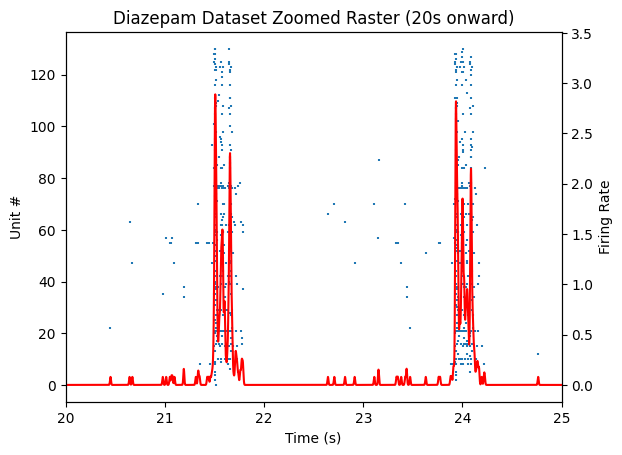

In [17]:
#Go to source code - anaylyse raster plot. Change the start time to 20 secons from 0. Set and change the limit. 
def raster_analysis_zoom(sd, start_s=20, duration_s=5):
    import matplotlib.pyplot as plt
    from scipy.ndimage import gaussian_filter1d
    import numpy as np

    # Get raster matrix
    raster_matrix = sd.raster(bin_size=1)  # rows = neurons, cols = time bins

    # Get time and indices
    indices, times = np.nonzero(raster_matrix)
    times = times.astype(float)  # ensure times are floats
    times_ms = times  # already in ms because bin_size=1

    # Filter to desired time window
    mask = (times_ms >= start_s * 1000) & (times_ms < (start_s + duration_s) * 1000)
    indices = indices[mask]
    times = times_ms[mask]

    # Smooth population rate
    pop_rate = sd.binned(bin_size=1)
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)
    t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000  # time in seconds

    # Plotting
    fig, ax = plt.subplots()
    ax.scatter(times / 1000, indices, marker='|', s=1)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Unit #")

    ax2 = ax.twinx()
    ax2.plot(t, pop_rate_smooth, c='r')
    ax2.set_ylabel("Firing Rate")

    ax.set_xlim(start_s, start_s + duration_s)
    plt.title("Diazepam Dataset Zoomed Raster (20s onward)")
    plt.show()
raster_analysis_zoom(data_diazepam, start_s=20, duration_s=5)



#### Micro

Create a graph that zooms in on the first **2** bursts from the Diazepam dataset. Compare this to the first **2** bursts of the control dataset. Inside of a burst do the neural acivity patterns look different? If so how?

<font color="green"><b>Answer

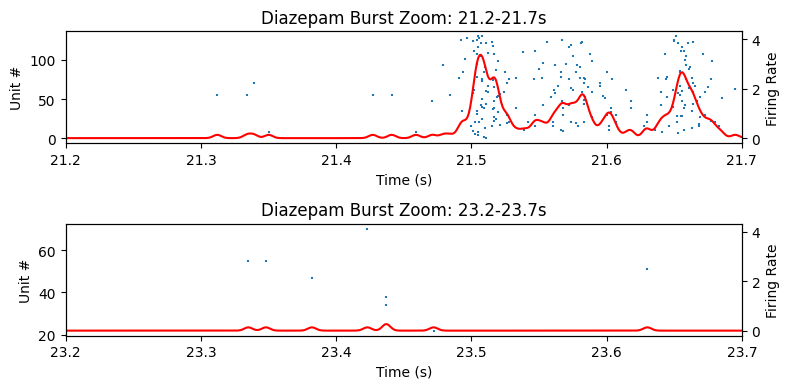

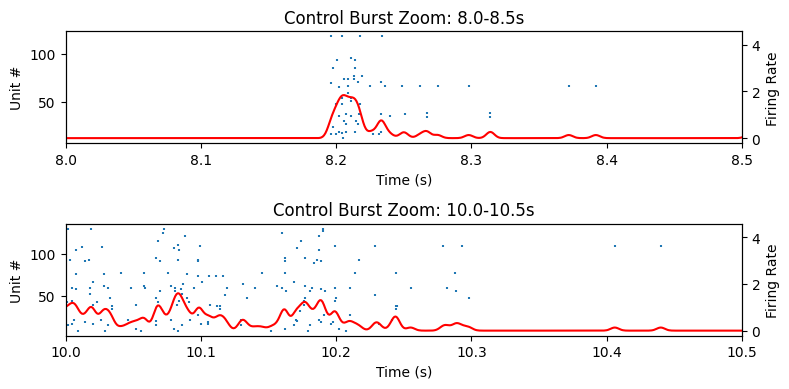

In [18]:
def burst_micro_zoom(sd, burst_times, duration_s=0.5, title=''):
    import matplotlib.pyplot as plt
    from scipy.ndimage import gaussian_filter1d
    import numpy as np

    raster_matrix = sd.raster(bin_size=1)
    indices, times = np.nonzero(raster_matrix)
    times = times.astype(float)

    pop_rate = sd.binned(bin_size=1)
    sigma = 3
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)
    t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000

    fig, axs = plt.subplots(len(burst_times), 1, figsize=(8, 2 * len(burst_times)))
    if len(burst_times) == 1:
        axs = [axs]  # ensure iterable

    for ax, burst_start in zip(axs, burst_times):
        start_ms = burst_start * 1000
        end_ms = (burst_start + duration_s) * 1000
        mask = (times >= start_ms) & (times < end_ms)
        ax.scatter(times[mask] / 1000, indices[mask], s=1, marker='|')
        ax.set_xlim(burst_start, burst_start + duration_s)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Unit #")

        ax2 = ax.twinx()
        ax2.plot(t, pop_rate_smooth, c='r')
        ax2.set_ylabel("Firing Rate")

        ax.set_title(f"{title} Burst Zoom: {burst_start}-{burst_start + duration_s}s")

    plt.tight_layout()
    plt.show()


# Plotting first 2 bursts in Diazepam
burst_micro_zoom(data_diazepam, burst_times=[21.2, 23.2], title="Diazepam")

# Plotting first 2 bursts in Control
burst_micro_zoom(data_control, burst_times=[8.0, 10.0], title="Control")


In the micro-scale view of the first two bursts from the Diazepam dataset, the spikes are tightly packed within a short time window, showing synchronized firing across many neurons. This indicates well-organized burst events. Compared to the Control dataset, the Diazepam bursts appear sharper and more structured, while the control bursts are more diffuse and variable, with spikes spread over a wider range of time and fewer neurons firing in sync. This supports the known effect of Diazepam in enhancing inhibitory signaling, making neural activity more organized and reducing randomness.

### Replicate Correlation and ISI (1.5 Points) <font color="green"> 

Plot the correlation matrix and the ISI histogram for the diazepam dataset. Briefly compare these plots to those from the control dataset.

<font color="green"><b>Answer

In the correlation matrix of the Diazepam dataset, we observe stronger and more structured correlations between many neuron pairs, which indicates that neuronal firing is more synchronized and coordinated. In contrast, the control dataset displays a more diffuse correlation pattern, suggesting less synchronized firing across neurons. Similarly, the ISI histogram for Diazepam shows a tighter distribution with a prominent peak, indicating more regular intervals between spikes and suggesting rhythmic bursting. The control dataset’s ISI histogram is broader and less peaked, implying more variability in spike timing. Together, these results show that Diazepam makes the network activity more organized and synchronized compared to the control.

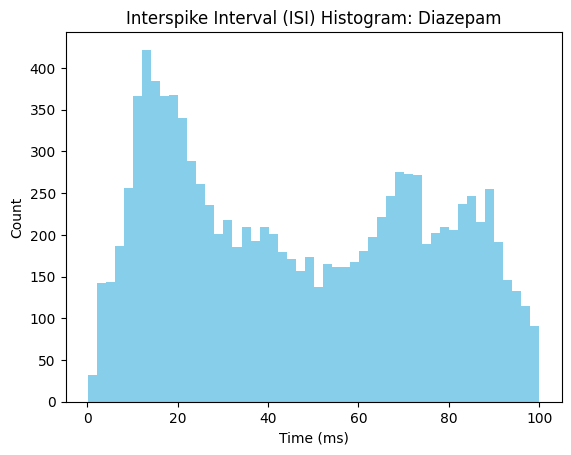

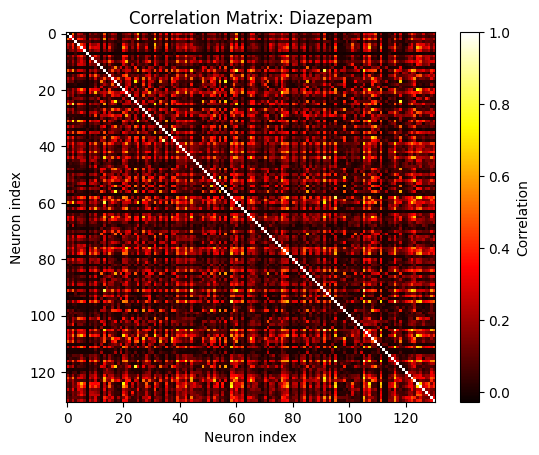

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# === ISI Histogram ===
def plot_isi_histogram(data, label):
    all_isis = []
    isi_list = data.interspike_intervals()
    for isi in isi_list:
        isi = isi[isi < 100]  # Remove anything > 100ms
        all_isis += isi.tolist()
    all_isis = np.array(all_isis)

    plt.figure()
    plt.hist(all_isis, bins=50, color='skyblue')
    plt.xlabel('Time (ms)')
    plt.ylabel('Count')
    plt.title(f'Interspike Interval (ISI) Histogram: {label}')
    plt.show()

# === Correlation Matrix ===
def plot_correlation_matrix(data, label):
    dense_raster = data.raster(bin_size=1)
    sigma = 5
    dense_raster = gaussian_filter1d(dense_raster.astype(float), sigma=sigma, axis=1)
    corr = np.corrcoef(dense_raster)

    plt.figure()
    plt.imshow(corr, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Correlation')
    plt.xlabel('Neuron index')
    plt.ylabel('Neuron index')
    plt.title(f'Correlation Matrix: {label}')
    plt.show()

# === Run for diazepam ===
plot_isi_histogram(data_diazepam, label='Diazepam')
plot_correlation_matrix(data_diazepam, label='Diazepam')



## Correlation & Spike Time Tilling (9.5 Points)

### Correlation Matrix Equation

Given a matrix $X$, with $n$ random variables as its rows, write down the formula that the correlation matrix

<font color="green"><b>Answer

In [20]:
import numpy as np

# Get the raster matrix (neurons x time)
raster_matrix = data_diazepam.raster(bin_size=1).astype(float)

# Compute the correlation matrix
correlation_matrix = np.corrcoef(raster_matrix)

### Diagonal of Correlation Matrix (1 Point)

What are the values on the diagonal of the correlation matrix? Why?

<font color="orange">**Hint:** If you need to, you can check the values of the diagonal in the source code. This is not necessary to receive full credit though.

<font color="green"><b>Answer

The values on the diagonal of a correlation matrix are all 1. This is because each value on the diagonal represents the correlation of a neuron with itself — and a variable is always perfectly correlated with itself. In mathematical terms, the Pearson correlation coefficient of any variable (or in this case, neuron spike train) with itself is 1, since there is no variability in the relationship — they rise and fall together perfectly at every point in time.

### Why STTC? (1.5 Points)

Briefly read through the paper on [spike time tilling](./reading_material/Spike_Time_Tiling.pdf). For electrophysiology, what is the advantage of using spike time tiling over correlation?

<font color="green"><b>Answer

The spike time tiling coefficient (STTC) offers several important advantages over traditional correlation measures, particularly in the context of electrophysiological data analysis. Unlike the commonly used correlation index, STTC is not confounded by firing rate—this means it can accurately reflect the synchrony between spike trains even when neurons fire at different rates, avoiding artificially inflated correlation values in low-firing neurons. It is also bounded between –1 and 1, making the results more interpretable, with +1 indicating perfect synchrony and 0 indicating no correlation. Additionally, STTC does not count periods of silence as correlated, which is crucial in sparse neural recordings like those from retinal activity or in vitro experiments where quiescent periods are common. By focusing on spike timing within a defined time window, STTC captures biologically meaningful patterns of synchrony without being skewed by overall activity levels. This makes it especially valuable when comparing neural activity across different conditions, such as wild-type versus mutant models, developmental stages, or pharmacological treatments like Diazepam.

### Plot STTC (2 Points)

Use the braingeneerspy package's [analysis code](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) to create a plot of the STTC for both the control dataset and the diazepam dataset. 

<font color="orange"><b>Hint:</b> This is the same package used in the source code to create the other plots. You only need to write 2 lines of code to complete this exercise. In the code, by default `delt=20`, leave it that way.

<font color="green"><b>Answer

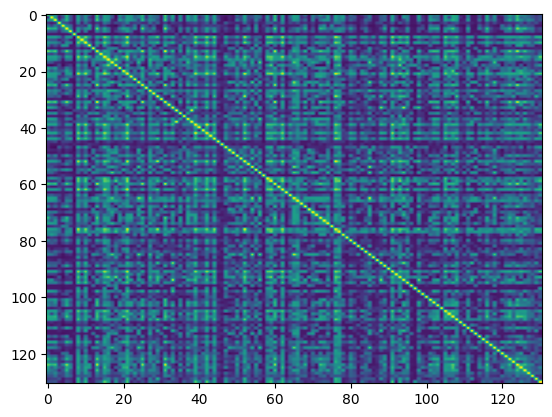

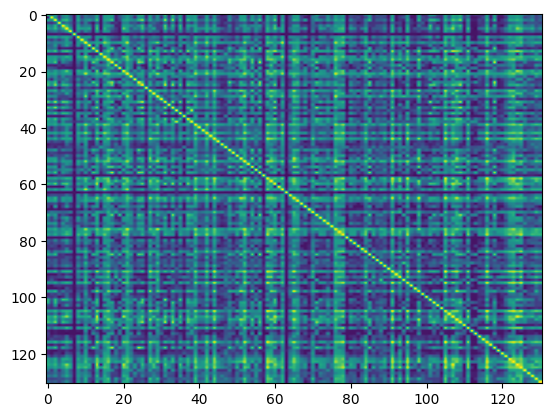

In [22]:
plt.imshow(data_control.spike_time_tilings(), aspect='auto')
plt.show()
plt.imshow(data_diazepam.spike_time_tilings(), aspect='auto')
plt.show()



### Compare Plots (1.5 Points)

Compare the two plots of the STTC. Does the variation between these plots make sense, considering our understanding of diazepam? Explain. Is the comparison between these two plots consistent with the variation you see between the correlation matrices of both datasets?

<font color="green"><b>Answer

Yes, the variation between the two STTC plots makes sense based on our understanding of diazepam. Diazepam is known to enhance inhibitory signaling in the brain, which typically reduces overall neural excitability and firing rates. This effect is visible in the STTC plot for the diazepam dataset, which shows lower synchrony among neurons compared to the control dataset. The control condition displays higher and more widespread synchrony, which is expected with more active baseline neural firing. This trend is consistent with what we observe in the correlation matrices: the control matrix appears more densely correlated, while the diazepam matrix shows more sparse and weaker correlations. Together, both the STTC and correlation matrix comparisons support the idea that diazepam dampens neural coordination and activity.

### Diagonal of STTC (1.5 Points)

What do the diagonal values of the STTC equal. Why is this the case?

<font color="green"><b>Answer

The diagonal values of the STTC matrix are always equal to 1. This is because each diagonal element represents the correlation of a neuron with itself. Since a neuron's spike train is perfectly correlated with itself at all timescales, the Spike Time Tiling Coefficient (STTC) assigns the maximum possible value of 1 to these self-comparisons. This serves as a baseline reference for comparing how strongly each neuron is correlated with others.